# Results

In [1]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

import blaze
import matplotlib
import numpy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

In [2]:
%matplotlib inline
# matplotlib.rcParams['figure.max_open_warning'] = 1000
# matplotlib.rcParams['lines.linewidth'] = 1.0

## Top negative sentences that contain "manager"

In [3]:
sentences_df = pd.read_csv('sentiment/last_tasks_scores.csv')

In [4]:
len(sentences_df)

8996

In [5]:
sentences_df.head()

,sentence,score
0,"General Motors will recall nearly 3,200 manua...",-0.666667
1,"He performs in his D.J. duo New World Punx, w...",0.500000
2,""" And Aim's problem is that many of its larges...",-0.125000
3,"""'Don't be evil,' he cried, while being chased...",-0.250000
4,"""A lot of companies seem to prefer it to other...",0.333333


In [6]:
manager_sentences_df = sentences_df[sentences_df.sentence.str.contains('manager', case=False)]

In [7]:
manager_top_neg_df = manager_sentences_df.sort('score').head(20)

In [8]:
manager_top_neg_df

,sentence,score
3076,Don't tell the manager.' Then he ran out and s...,-2.000000
2799,"CVS Caremark, the large drugstore chain and ph...",-1.714286
1341,A month-long shutdown at a big Maruti plant cl...,-1.666667
5096,"Marty Hurney, who was fired as the Panthers' g...",-1.666667
717,"'The games are fairly clean, because we're str...",-1.666667
4929,"Last month, the company completed a round of b...",-1.571429
2828,"Charles Jones, 42, the manager of gentleman's ...",-1.500000
4110,"In 2000, Mike Milbury, then the Islanders' gen...",-1.500000
7712,The hedge fund manager played a central role i...,-1.400000
6504,"Several years ago, Francine Bostick, a now-ret...",-1.400000


In [9]:
for i, x in enumerate(manager_top_neg_df.sentence):
    print(i + 1, '---', x)
    print()
    

1 --- Don't tell the manager.' Then he ran out and shut the door.

2 --- CVS Caremark, the large drugstore chain and pharmacy benefit manager, recently said it would require its 200,000 employees to report their weight, blood sugar and cholesterol or be forced to pay an annual penalty of $600.

3 --- A month-long shutdown at a big Maruti plant close to New Delhi cut the company's production during August 2012, following industrial unrest and rioting in which a senior manager was killed.

4 --- Marty Hurney, who was fired as the Panthers' general manager last October, did not respond to a message left on his cellphone.

5 --- 'The games are fairly clean, because we're strict about being rough,' said Bob Weyersberg, a hockey official and youth coach who is also the league's founder and manager.

6 --- Last month, the company completed a round of buyouts and layoffs of about 30 managers.

7 --- Charles Jones, 42, the manager of gentleman's club, was killed and a 44-year-old woman was woun

## entrepreneur vs. manager

In [10]:
%%time

dtypes = {
    'article_id': str,
    'date': pd.tslib.Timestamp,
    'term': str,
    'sentence': str,
    'sentiment': str,
    'source': str,
    'n_months': int,
}

sentences_df = pd.read_csv('nyt_ft_sent_data.csv', header=0, dtype=dtypes, parse_dates=['date'])

CPU times: user 6.04 s, sys: 294 ms, total: 6.33 s
Wall time: 6.32 s


In [11]:
len(sentences_df)

1684129

In [12]:
sentences_df.head()

,article_id,date,term,sentence,sentiment,source,n_months
0,4fd20d7d8eb7c8105d77daf9,1999-01-16,new venture,Keeneland's new venture came as a surprise to ...,pos,nyt,0
1,4fd20db88eb7c8105d77e511,1999-01-03,manager,The plan Presley and his hucksterish business ...,neg,nyt,0
2,5482d92a38f0d8403d9cd045,2008-07-08,Twitch,In the male toadfish the swimbladder has been ...,pos,nyt,114
3,5456ab1438f0d86ef22a094e,2009-10-04,executive,Mr. Pozycki is the chief executive of SJP Prop...,pos,nyt,129
4,5456ab1438f0d86ef22a094e,2009-10-04,executive,Mr. Pozycki 59 is the chief executive of SJP P...,pos,nyt,129


In [13]:
entrepreneur_manager_df = sentences_df[sentences_df.term.isin(['entrepreneur', 'manager'])]

In [14]:
entrepreneur_manager_blaze = blaze.Data(entrepreneur_manager_df)

In [15]:
blaze.by(entrepreneur_manager_blaze.term,
   total_amount=entrepreneur_manager_blaze.sentiment.count(),
   amount_pos=entrepreneur_manager_blaze[entrepreneur_manager_blaze.sentiment == 'pos'].sentiment.count(),
   amount_neg=entrepreneur_manager_blaze[entrepreneur_manager_blaze.sentiment == 'neg'].sentiment.count()
)

,term,amount_neg,amount_pos,total_amount
0,entrepreneur,4326,20971,25297
1,manager,119454,83749,203203


In [16]:
grouped_by_term = blaze.by(blaze.merge(entrepreneur_manager_blaze.term, entrepreneur_manager_blaze.n_months),
   total_amount=entrepreneur_manager_blaze.sentiment.count(),
   amount_pos=entrepreneur_manager_blaze[entrepreneur_manager_blaze.sentiment == 'pos'].sentiment.count(),
   amount_neg=entrepreneur_manager_blaze[entrepreneur_manager_blaze.sentiment == 'neg'].sentiment.count()
)

### Visualization

In [17]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError ("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y[(window_len/2-1):-(window_len/2)]


In [18]:
def plot(term_list=None, same=False, info='total', category_list=None, figsize=(16, 8), window_len=20, window='hanning'):
    if term_list and not same:
        for term in term_list:
            df = blaze.odo(grouped_by_term[grouped_by_term.term == term], pd.DataFrame)
            df.set_index('n_months', inplace=True)
            df.index = [datetime.strptime("1999-01-01", "%Y-%m-%d") + relativedelta(months=i) for i in df.index]
            df['pos_rate'] = df['amount_pos'] / df['total_amount']
            y1_df = df[['total_amount', 'amount_pos', 'amount_neg']]
            y1_df.plot(title=term, figsize=figsize)
            y2 = smooth(
                    df['pos_rate'].values,
                    window_len=window_len,
                    window=window
            )
            y2_df = pd.DataFrame(y2, columns=['pos_rate'], index=df.index)
            y2_df.plot(title=term, ylim=[0, 1], color='green', figsize=figsize)
    elif term_list and same:
        ax = plt.figure(figsize=figsize).add_subplot(1, 1, 1)
        for term in term_list:
            df = blaze.odo(grouped_by_term[grouped_by_term.term == term], pd.DataFrame)
            df.set_index('n_months', inplace=True)
            df.index = [datetime.strptime("1999-01-01", "%Y-%m-%d") + relativedelta(months=i) for i in df.index]
            df['pos_rate'] = df['amount_pos'] / df['total_amount']
            if info == 'total':
                y = smooth(
                    df['total_amount'].values,
                    window_len=window_len,
                    window=window
                )
                y_df = pd.DataFrame(y, columns=['total_amount'], index=df.index)
                y_df.plot(title='All together', figsize=figsize, ax=ax)
            else:
                y = smooth(
                    df['pos_rate'].values,
                    window_len=window_len,
                    window=window
                )
                y_df = pd.DataFrame(y, columns=['pos_rate'], index=df.index)
                y_df.plot(title='All together', ylim=[0, 1], figsize=figsize, ax=ax)
        ax.legend(term_list)
    elif category_list:
        category_dict = {
            11: 'executive/manager',
            12: 'entrepreneur/founder/new venture',
            2: 'big companies',
            3: 'new companies',
        }
        if not same:
            for category in category_list:
                df = blaze.odo(grouped_by_category[grouped_by_category.term_category == category], pd.DataFrame)
                df.set_index('n_months', inplace=True)
                df.index = [datetime.strptime("1999-01-01", "%Y-%m-%d") + relativedelta(months=i) for i in df.index]
                df['pos_rate'] = df['amount_pos'] / df['total_amount']
                y1_df = df[['total_amount', 'amount_pos', 'amount_neg']]
                y1_df.plot(title=category_dict[category], figsize=figsize)
        else:
            ax = plt.figure(figsize=figsize).add_subplot(1, 1, 1)
            for category in category_list:
                df = blaze.odo(grouped_by_category[grouped_by_category.term_category == category], pd.DataFrame)
                df.set_index('n_months', inplace=True)
                df.index = [datetime.strptime("1999-01-01", "%Y-%m-%d") + relativedelta(months=i) for i in df.index]
                df['pos_rate'] = df['amount_pos'] / df['total_amount']
                y2 = smooth(
                        df['pos_rate'].values,
                        window_len=window_len,
                        window=window
                )
                y2_df = pd.DataFrame(y2, columns=['pos_rate'], index=df.index)
                y2_df.plot(title='All together', ylim=[0, 1], figsize=figsize, ax=ax)
            ax.legend(['new companies', 'big companies', 'entrepreneur/founder', 'executive/manager'])

/home/antonio/.virtualenvs/nytimes/lib/python3.4/site-packages/ipykernel/__main__.py:56: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


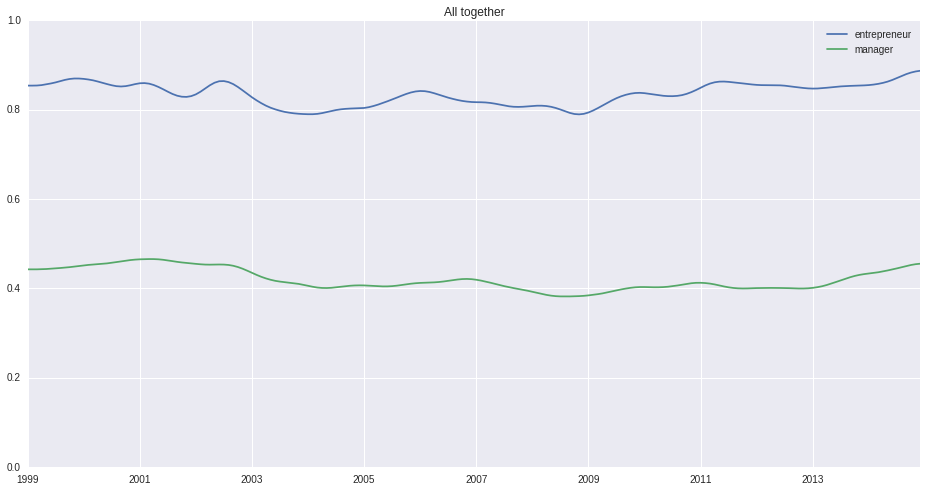

In [19]:
plot(term_list=['entrepreneur', 'manager'], info='pos_rate', same=True)

/home/antonio/.virtualenvs/nytimes/lib/python3.4/site-packages/ipykernel/__main__.py:56: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


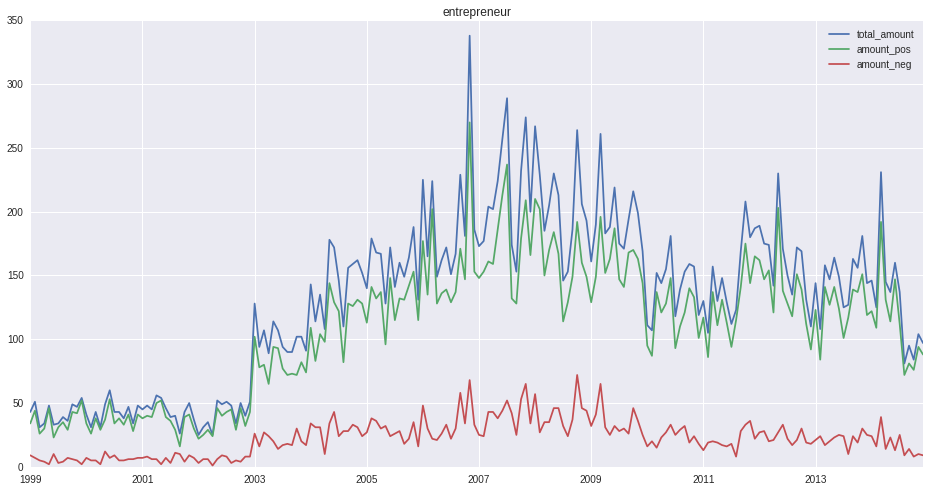

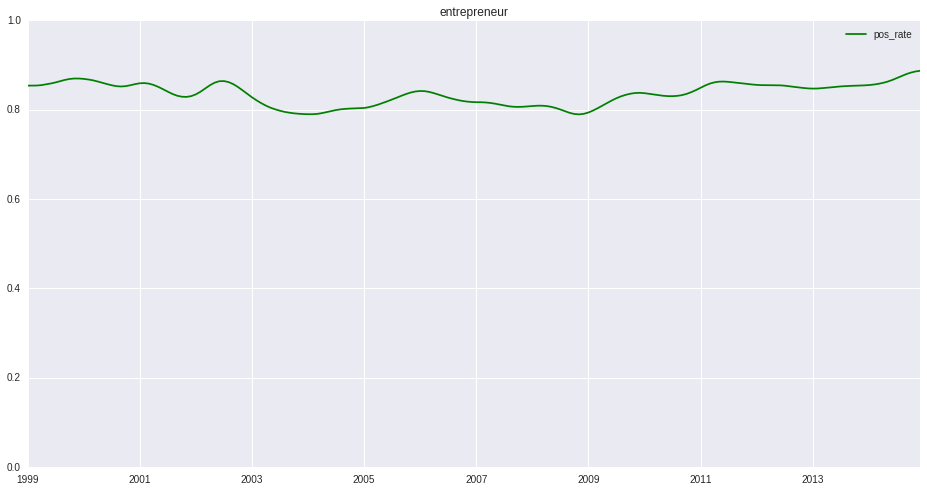

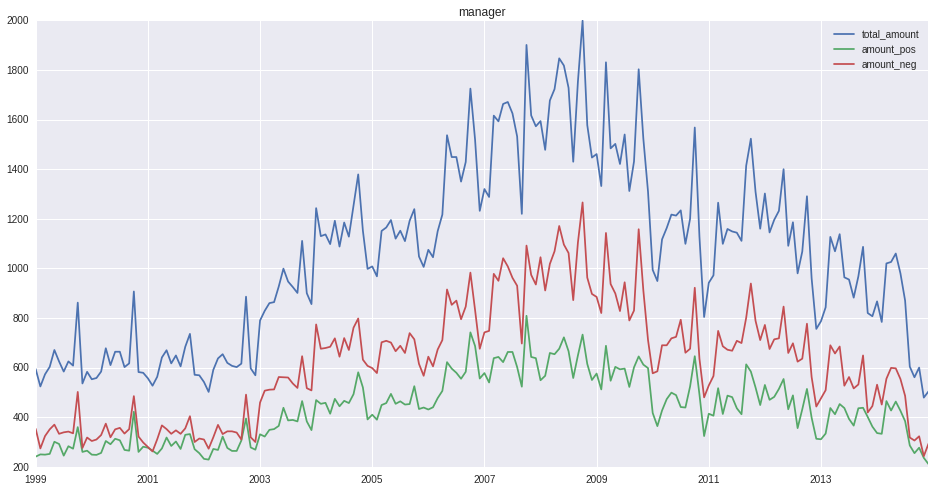

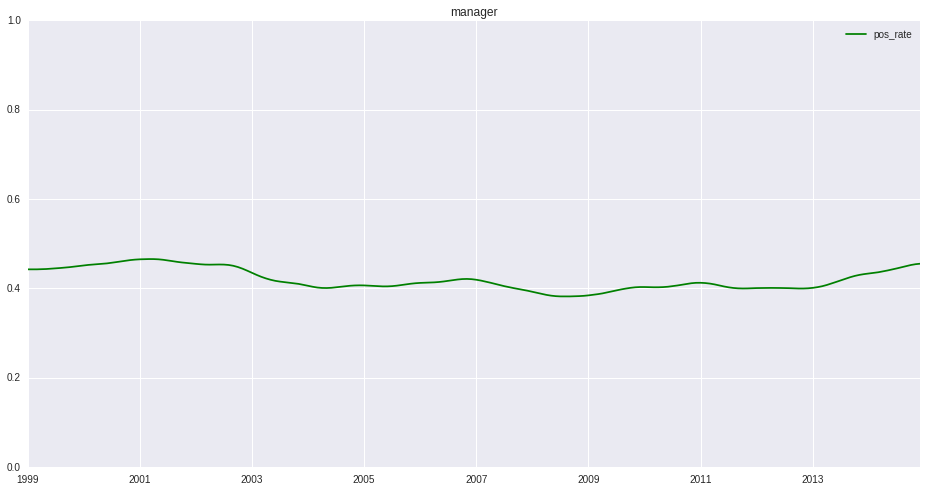

In [20]:
plot(term_list=['entrepreneur', 'manager'])

### "pos_rate" explanation

The measurement "pos_rate" is the "percentage" of positive sentences over the total sentences, normalized to the range [0, 1], on a specific term calculated month by month. That is, let T be a term, X be the number of sentences that contain T, P be the number of positive sentences (out of X), and N be the number of negative sentences (N = X - P); pos_rate = P / X. The measurement "pos_rate" multiplied by 100 is the actual percentage

In [21]:
# Example:
# Given T, let's have:
X = 200
# For month 1:
P = 120
N = 80
pos_rate = P / X
print('Month 1:', pos_rate, ' --> ', pos_rate * 100, '%')
# For month 2:
P = 140
N = 60
pos_rate = P / X
print('Month 2:', pos_rate, ' --> ', pos_rate * 100, '%')
# Etc.

Month 1: 0.6  -->  60.0 %
Month 2: 0.7  -->  70.0 %


### Numeric results

In [22]:
terms_df = blaze.odo(grouped_by_term, pd.DataFrame)

In [23]:
terms_df.head()

,term,n_months,amount_neg,amount_pos,total_amount
0,entrepreneur,0,9,34,43
1,entrepreneur,1,7,44,51
2,entrepreneur,2,5,26,31
3,entrepreneur,3,4,30,34
4,entrepreneur,4,2,46,48


In [24]:
terms_df['difference'] = terms_df.apply(lambda x: abs(x.amount_neg - x.amount_pos), axis=1)

In [25]:
def restore_date(n_months):
    return datetime(1999, 1, 1) + relativedelta(months=n_months)

def print_date(d):
    return d.strftime('%Y-%m-%d')

In [26]:
for term in ['entrepreneur', 'manager']:
    term_df = terms_df[terms_df.term == term]
    term_min = term_df.difference.min()
    term_max = term_df.difference.max()
    print(term)
    print('min')
    term_min_df = term_df[term_df.difference == term_min]
    display(term_min_df)
    for i, x in term_min_df.iterrows():
        print('date:', print_date(restore_date(x.n_months)))
    print('max')
    term_max_df = term_df[term_df.difference == term_max]
    display(term_max_df)
    for i, x in term_max_df.iterrows():
        print('date:', print_date(restore_date(x.n_months)))
    print()

entrepreneur
min


,term,n_months,amount_neg,amount_pos,total_amount,difference
32,entrepreneur,32,10,16,26,6


date: 2001-09-01
max


,term,n_months,amount_neg,amount_pos,total_amount,difference
94,entrepreneur,94,68,270,338,202


date: 2006-11-01

manager
min


,term,n_months,amount_neg,amount_pos,total_amount,difference
216,manager,24,280,277,557,3
217,manager,25,262,265,527,3


date: 2001-01-01
date: 2001-02-01
max


,term,n_months,amount_neg,amount_pos,total_amount,difference
309,manager,117,1266,733,1999,533


date: 2008-10-01

